# Python Codes

Later in this course, we will need to use a statistical software such as `Python` or `R`, as we won't be able to make a lot of computations by hand or we won't be able to recognize or write the probability distribution we're interested in analytically. 

You won't need to code a lot, but it won't hurt if you start getting used to `Python` or `R` a bit.  
If I do a visualization or do a computation using Python, I'll put the code here.

## Drawing the histogram of a binomial distribution:

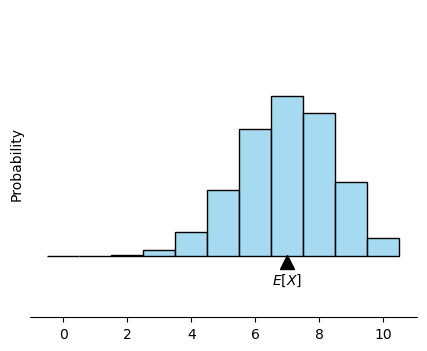

In [1]:
# import the necessary packages to compute and visualize in python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameters for the binomial distribution
n = 10
p = 0.7

# generate binomial distribution
data = np.random.binomial(n, p, 10000)

# plot histogram using seaborn
plt.figure(figsize=(5, 4))
sns.histplot(data, 
             bins=np.arange(-0.5, n+1.5, 1), 
             kde=False, stat='probability', 
             color='skyblue', 
             edgecolor='black')

# calculate expected value E[X] = np
expected_value = n * p

# add a triangle and label it by E[X]
plt.plot(expected_value, -0.01, marker='^', markersize=10, color='black')
plt.text(expected_value, -0.04, '$E[X]$', ha='center', va='center')

# cleaning the graph, we don't need the numbers
plt.ylim(-0.1, 0.4)  
plt.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
sns.despine(left=True, bottom=False)


plt.show()

## How to visualize the expectation of a function

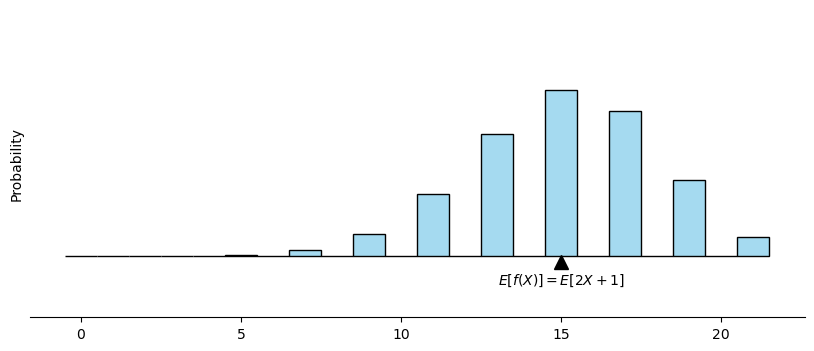

In [2]:
# import the necessary packages to compute and visualize in python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# parameters for the binomial distribution
n = 10
p = 0.7

# generate binomial distribution
data = 2*np.random.binomial(n, p, 10000)+1

# plot histogram using seaborn
plt.figure(figsize=(10, 4))
sns.histplot(data, 
             bins=np.arange(-0.5, 2*n+2.5, 1), 
             kde=False, stat='probability', 
             color='skyblue', 
             edgecolor='black')

# calculate expected value E[X] = np
expected_value = 2*n * p+1

# add a triangle and label it by E[X]
plt.plot(expected_value, -0.01, marker='^', markersize=10, color='black')
plt.text(expected_value, -0.04, '$E[f(X)] = E[2X+1]$', ha='center', va='center')

# cleaning the graph, we don't need the numbers
plt.ylim(-0.1, 0.4)  
plt.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
sns.despine(left=True, bottom=False)

plt.show()

## How to visualize a joint probability distribution of continuous random variables

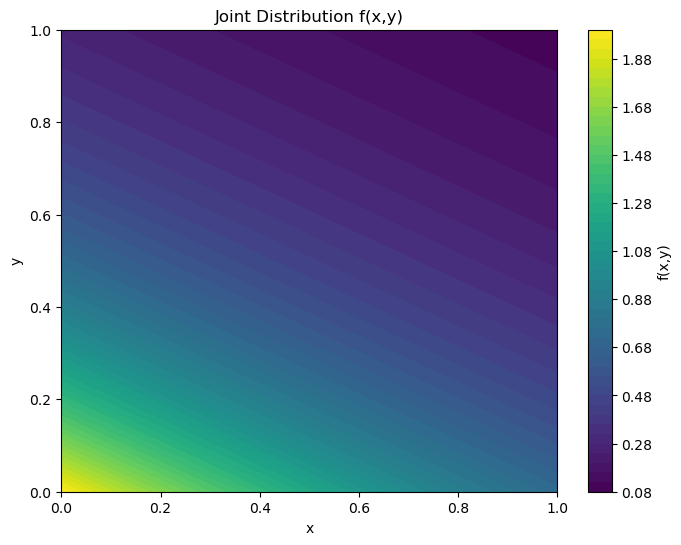

In [3]:
def joint_distribution(x, y):
    return 2 * np.exp(-x) * np.exp(-2 * y)
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, y)
Z = joint_distribution(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, 50, cmap='viridis')  # 50 is the number of contour levels
plt.colorbar(label='f(x,y)')
plt.title('Joint Distribution f(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

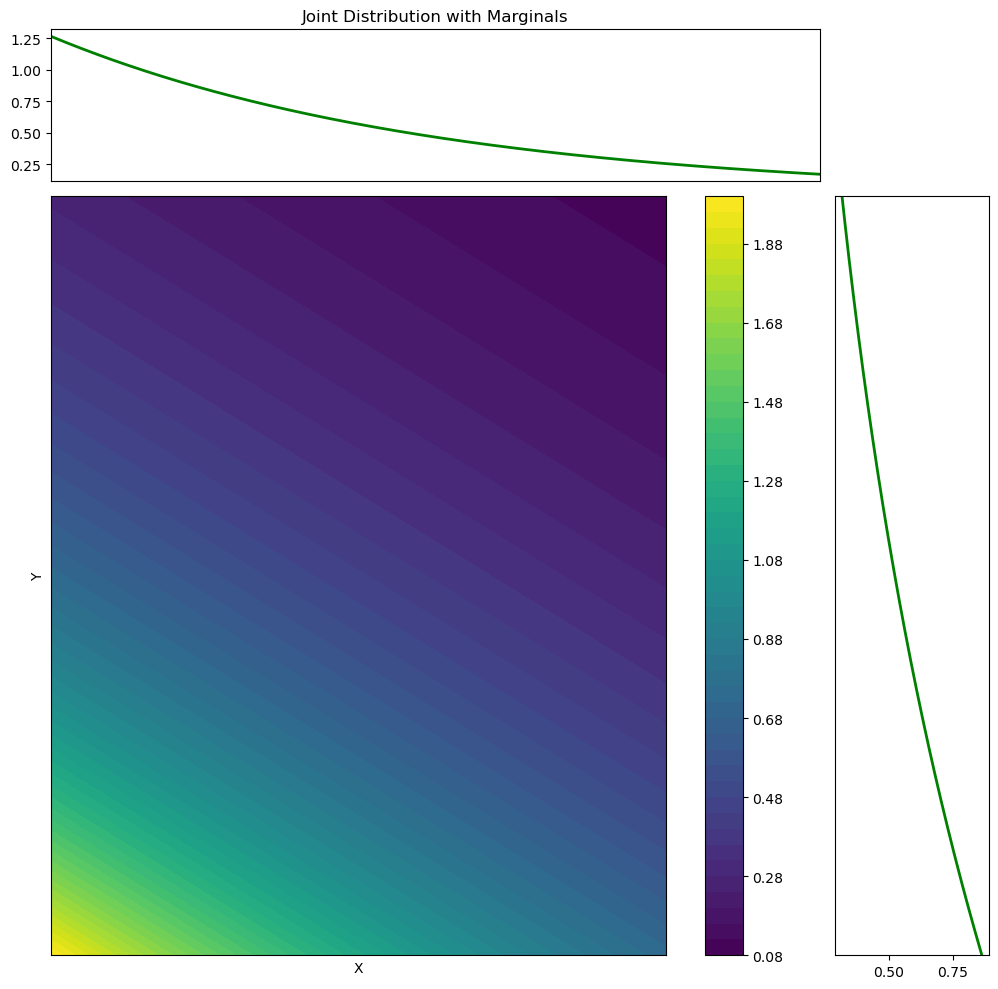

In [9]:
import matplotlib.gridspec as gridspec

def joint_distribution(x, y):
    return 2 * np.exp(-x) * np.exp(-2 * y)

x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, y)
Z = joint_distribution(X, Y)
# Marginal distribution of X (integrate out Y)
marginal_x = np.trapz(Z, y, axis=1)

# Marginal distribution of Y (integrate out X)
marginal_y = np.trapz(Z, x, axis=0)
# Set up the figure and gridspec
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 5])
ax_joint = fig.add_subplot(gs[1, 0])
ax_marg_x = fig.add_subplot(gs[0, 0], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1, 1], sharey=ax_joint)

# Plot the joint distribution
c = ax_joint.contourf(X, Y, Z, 50, cmap='viridis')
fig.colorbar(c, ax=ax_joint)

# Plot the marginals
ax_marg_x.plot(x, marginal_x, 'g', lw=2)
ax_marg_y.plot(marginal_y, y, 'g', lw=2)

# Remove ticks from the marginals
ax_marg_x.set_xticks([])
ax_marg_y.set_yticks([])

# Set labels
ax_joint.set_xlabel('X')
ax_joint.set_ylabel('Y')
ax_marg_x.set_title('Joint Distribution with Marginals')

plt.tight_layout()
plt.show()

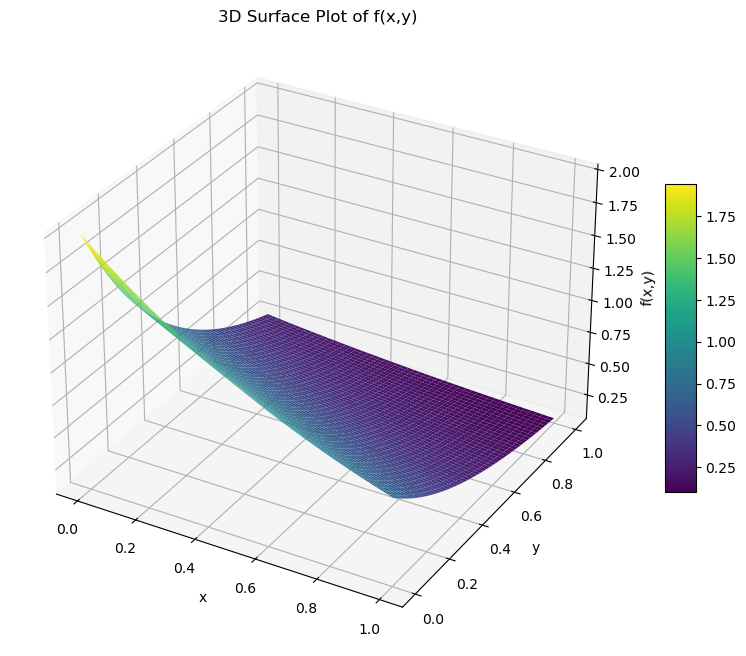

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot of f(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

## Homework 2, problem 1

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def probability(k, lambda_, n):
    """
    Compute the probability P(X=k/n) for given k, lambda, and n.
    """
    numerator = 1 - np.exp(-lambda_/n)
    denominator = np.exp(k*lambda_/n)
    return numerator / denominator

def plot_distribution(lambda_=2, n=10):
    k_values = np.arange(0, 5*n)  

    # Compute probabilities for each k
    probabilities = [probability(k, lambda_, n) for k in k_values]

    # Plot
    plt.figure(figsize=(10,6))
    plt.bar(k_values/n, probabilities, width=0.05)
    plt.xlabel('X = k/n')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution for λ = {lambda_} and n = {n}')
    plt.ylim(0, max(probabilities) + 0.05)  # Adjust y-axis limit for better visualization
    plt.show()

# Create interactive sliders
lambda_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='λ:')
n_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='n:')

widgets.interactive(plot_distribution, lambda_=lambda_slider, n=n_slider)


interactive(children=(FloatSlider(value=2.0, description='λ:', max=10.0, min=0.1), IntSlider(value=10, descrip…

In [19]:
def probability(k, lambda_, n):
    """
    Compute the probability P(X=k/n) for given k, lambda, and n.
    """
    numerator = 1 - np.exp(-lambda_/n)
    denominator = np.exp(k*lambda_/n)
    return numerator / denominator

n = 10000000
lambda_ = 3
k_values = np.arange(0, 5*n)

sum([probability(k, lambda_, n) for k in k_values[2*n:3*n]])

0.0023553423724941855